### 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("./Samples/통신사 고객 이탈 데이터.csv")

In [2]:
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,No Complaints,38,Minimum Amount,4370,71,5,17,Age Group 3,Prepaid Plan,Active,30,197.640,0
1,0,No Complaints,39,Minimum Amount,318,5,7,4,Age Group 2,Prepaid Plan,Inactive,25,46.035,0
2,10,No Complaints,37,Minimum Amount,2453,60,359,24,Age Group 3,Prepaid Plan,Active,30,1536.520,0
3,10,No Complaints,38,Minimum Amount,4198,66,1,35,Young Age Group,Prepaid Plan,Active,15,240.020,0
4,3,No Complaints,38,Minimum Amount,2393,58,2,33,Young Age Group,Prepaid Plan,Active,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,No Complaints,19,Charge Level 2,6697,147,92,44,Age Group 2,Contract Plan,Active,25,721.980,0
3146,17,No Complaints,17,Charge Level 1,9237,177,80,42,Old Age Group,Prepaid Plan,Active,55,261.210,0
3147,13,No Complaints,18,Charge Level 4,3157,51,38,21,Age Group 3,Prepaid Plan,Active,30,280.320,0
3148,7,No Complaints,11,Charge Level 2,4695,46,222,12,Age Group 3,Prepaid Plan,Active,30,1077.640,0


### 전처리

In [3]:
# 결측치
data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             7
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

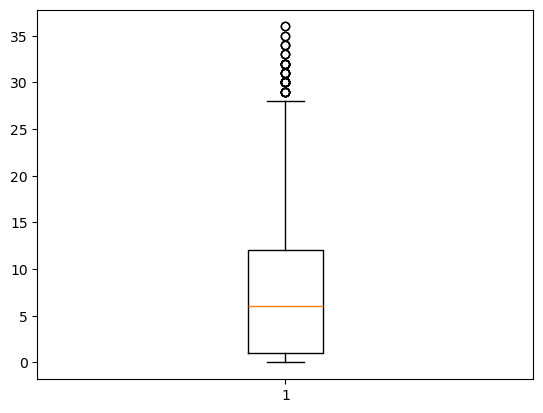

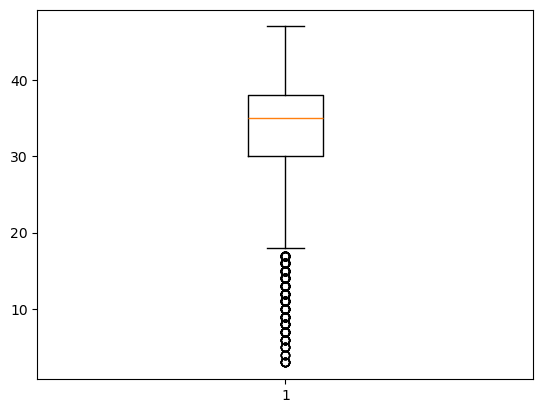

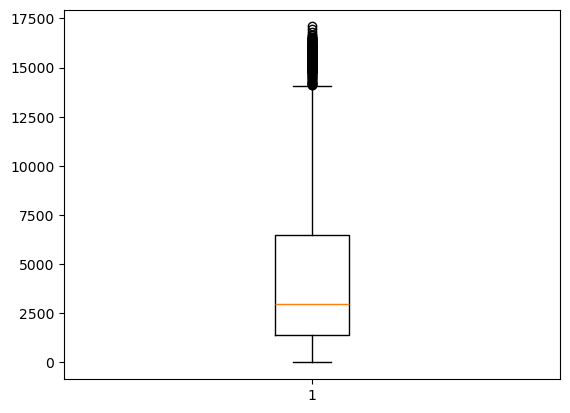

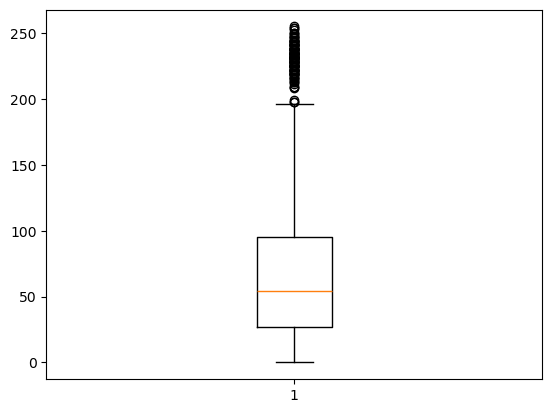

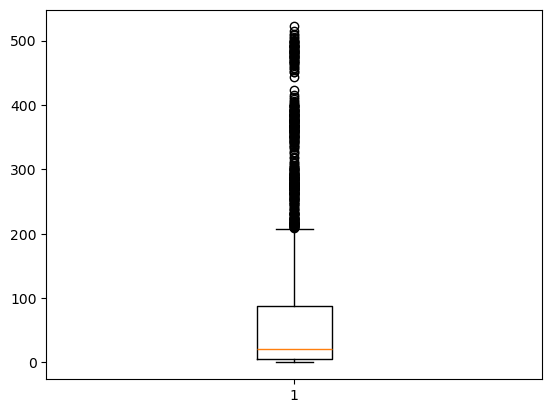

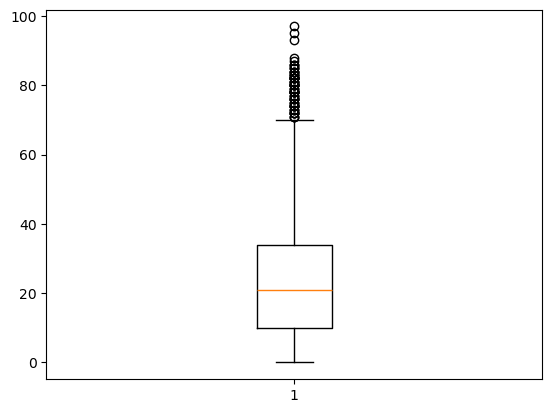

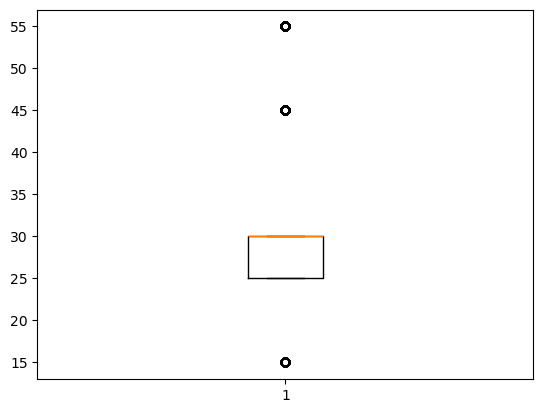

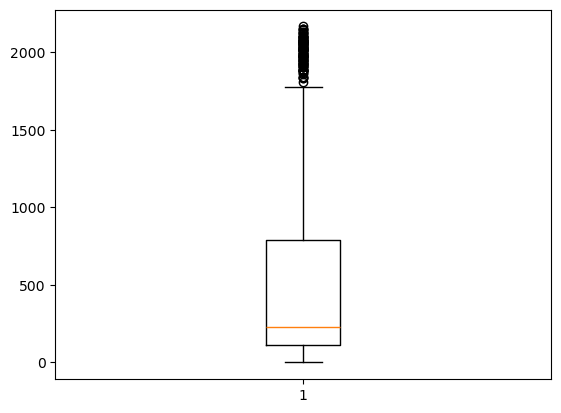

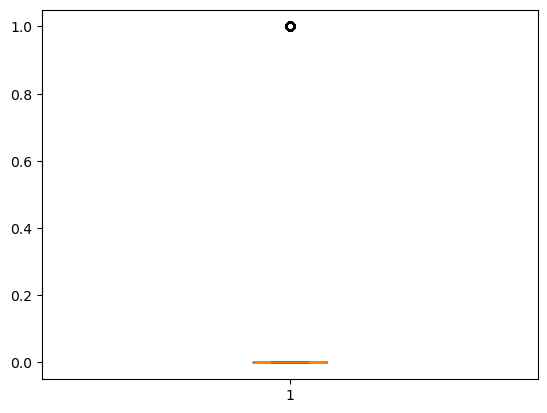

In [4]:
# 이상치
for i in data.columns:
    if data[i].dtype != object:
        plt.boxplot(data[i])
        plt.show()

In [5]:
# # 이상치 제거
# for i in data.columns:
#     if data[i].dtype != object:
#         # 사분위수
#         Q1_salary = data[i].quantile(0.25)
#         Q3_salary = data[i].quantile(0.75)
        
#         # IQR 계산
#         IQR_salary = Q3_salary - Q1_salary
        
#         # 데이터가 존재할 수 있는 정상 범위를 구해보자
#         lower_salary = Q1_salary - 1.5 * IQR_salary
#         upper_salary = Q3_salary + 1.5 * IQR_salary

#         # 이상치 제거
#         data.drop(data.loc[(lower_salary > data[i]) | (upper_salary < data[i]), :].index, inplace = True)

# 이상치를 제거 했더니 이탈자가 전부 사라짐

# 결측치 제거
data.dropna(inplace = True)

In [6]:
# 결측치
data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

### 데이터 분석

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3143 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3143 non-null   int64  
 1   Complains                3143 non-null   object 
 2   Subscription  Length     3143 non-null   int64  
 3   Charge  Amount           3143 non-null   object 
 4   Seconds of Use           3143 non-null   int64  
 5   Frequency of use         3143 non-null   int64  
 6   Frequency of SMS         3143 non-null   int64  
 7   Distinct Called Numbers  3143 non-null   int64  
 8   Age Group                3143 non-null   object 
 9   Tariff Plan              3143 non-null   object 
 10  Status                   3143 non-null   object 
 11  Age                      3143 non-null   int64  
 12  Customer Value           3143 non-null   float64
 13  Churn                    3143 non-null   int64  
dtypes: float64(1), int64(8), obje

In [8]:
# 이탈자에 대한 상관계수 절대값
data.corr(numeric_only = True)["Churn"].abs().sort_values(ascending = False)

Churn                      1.000000
Frequency of use           0.302935
Seconds of Use             0.298305
Customer Value             0.289803
Distinct Called Numbers    0.278200
Frequency of SMS           0.221300
Subscription  Length       0.031743
Age                        0.015220
Call  Failure              0.006311
Name: Churn, dtype: float64

In [9]:
def ChurnCount(column):
    """이탈자 수 세기"""
    # 수를 저장할 딕셔너리
    count = {}

    # 수를 세기 위한 딕셔너리 초기화
    for i in data[column].unique():
        count[i] = np.array([0, 0])

    # [이탈자, 데이터 수] 세기
    for i in data.index:
        count[data.loc[i, column]] += np.array([data.loc[i, "Churn"], 1])

    # 출력
    for i in count.keys():
        print(f"{i}\n\t전체{count[i][1]}\n\t이탈자{count[i][0]}\n\t비율{count[i][0] / count[i][1]}\n")

In [10]:
for i in data.columns:
    if data[i].dtype == object:
        print("=== ", i, " ===")
        ChurnCount(i)
    

===  Complains  ===
No Complaints
	전체2903
	이탈자295
	비율0.10161901481226318

Has Complaints
	전체240
	이탈자200
	비율0.8333333333333334

===  Charge  Amount  ===
Minimum Amount
	전체1768
	이탈자421
	비율0.23812217194570134

Charge Level 1
	전체617
	이탈자43
	비율0.06969205834683954

Charge Level 2
	전체395
	이탈자23
	비율0.05822784810126582

Charge Level 3
	전체199
	이탈자7
	비율0.035175879396984924

Charge Level 8
	전체19
	이탈자0
	비율0.0

Charge Level 4
	전체76
	이탈자1
	비율0.013157894736842105

Maximum Amount
	전체14
	이탈자0
	비율0.0

Charge Level 7
	전체14
	이탈자0
	비율0.0

Charge Level 5
	전체30
	이탈자0
	비율0.0

Charge Level 6
	전체11
	이탈자0
	비율0.0

===  Age Group  ===
Age Group 3
	전체1425
	이탈자230
	비율0.16140350877192983

Age Group 2
	전체1037
	이탈자184
	비율0.17743490838958534

Young Age Group
	전체123
	이탈자0
	비율0.0

Age Group 4
	전체395
	이탈자79
	비율0.2

Old Age Group
	전체163
	이탈자2
	비율0.012269938650306749

===  Tariff Plan  ===
Prepaid Plan
	전체2902
	이탈자489
	비율0.16850447966919366

Contract Plan
	전체241
	이탈자6
	비율0.024896265560165973

===  Status  ===
Active
	전체2361
	

### 학습 데이터

In [11]:
# 학습할 요소 선정
data = data[["Complains", "Charge  Amount", "Age Group", "Tariff Plan", "Status", "Churn"]]

In [12]:
# 문자열 데이터를 숫자로 변경
# 문자열 데이터의 유니크 값이 많지 않다고 판단하여 원핫인코딩 사용
data = pd.get_dummies(data, dtype = 'int64')
data

,Churn,Complains_Has Complaints,Complains_No Complaints,Charge Amount_Charge Level 1,Charge Amount_Charge Level 2,Charge Amount_Charge Level 3,Charge Amount_Charge Level 4,Charge Amount_Charge Level 5,Charge Amount_Charge Level 6,Charge Amount_Charge Level 7,...,Charge Amount_Minimum Amount,Age Group_Age Group 2,Age Group_Age Group 3,Age Group_Age Group 4,Age Group_Old Age Group,Age Group_Young Age Group,Tariff Plan_Contract Plan,Tariff Plan_Prepaid Plan,Status_Active,Status_Inactive
0,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3146,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3147,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3148,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [13]:
# 학습 데이터, 테스트 데이터 분류
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = "Churn"), data["Churn"], test_size = 0.3, random_state = 1945)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2200, 21) (943, 21) (2200,) (943,)


### 모델 학습

In [14]:
# 선형회귀 모델
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# 평가
print(model.score(X_test, y_test))

0.4041683095150026


In [15]:
# 이웃
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

# 평가
print(model.score(X_test, y_test))

0.8663838812301167


In [16]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 평가
print(model.score(X_test, y_test))

0.9003181336161188


In [17]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# 평가
print(model.score(X_test, y_test))

0.9013785790031813
